In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Load datasets
print("Loading datasets...")
train_df = pd.read_csv('../data/bank_marketing_train.csv')
test_df = pd.read_csv('../data/bank_marketing_test.csv')

print(f"Training set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")

Loading datasets...
Training set shape: (26246, 25)
Test set shape: (8000, 24)


In [3]:
# Basic dataset information
print("=== TRAINING SET INFO ===")
print(train_df.info())
print("\n=== TEST SET INFO ===")
print(test_df.info())

=== TRAINING SET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26246 entries, 0 to 26245
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             26246 non-null  int64  
 1   job             26246 non-null  object 
 2   marital         26246 non-null  object 
 3   education       26246 non-null  object 
 4   default         26246 non-null  object 
 5   housing         26246 non-null  object 
 6   loan            26246 non-null  object 
 7   contact         26246 non-null  object 
 8   month           26246 non-null  object 
 9   day_of_week     26246 non-null  object 
 10  campaign        26246 non-null  int64  
 11  pdays           26246 non-null  int64  
 12  previous        26246 non-null  int64  
 13  poutcome        26246 non-null  object 
 14  emp.var.rate    26246 non-null  float64
 15  cons.price.idx  26246 non-null  float64
 16  cons.conf.idx   26246 non-null  float64
 17  eurib

In [4]:
# Display first few rows of training data
print("First 5 rows of training data:")
print(train_df.head())

First 5 rows of training data:
   age         job   marital          education  default housing loan  \
0   72     retired   married           basic.4y       no      no   no   
1   30      admin.    single  university.degree       no     yes   no   
2   31  unemployed   married  university.degree       no     yes   no   
3   37      admin.   married        high.school       no     yes  yes   
4   53  unemployed  divorced           basic.9y  unknown      no   no   

     contact month day_of_week  ...  cons.price.idx  cons.conf.idx  euribor3m  \
0  telephone   apr         tue  ...          93.075          -47.1      1.453   
1   cellular   aug         tue  ...          94.027          -38.3      0.886   
2   cellular   aug         fri  ...          93.444          -36.1      4.966   
3   cellular   nov         mon  ...          92.649          -30.1      0.722   
4  telephone   may         thu  ...          93.994          -36.4      4.860   

  nr.employed  feature_1  feature_2  featur

In [5]:
# Display first few rows of test data
print("First 5 rows of test data:")
display(test_df.head())

First 5 rows of test data:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,feature_1,feature_2,feature_3,feature_4,feature_5
0,34,blue-collar,married,basic.6y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,4.6443,38.8889,vg3,lv1,fn38
1,29,admin.,married,high.school,no,yes,no,telephone,jun,fri,...,1.4,94.465,-41.8,4.959,5228.1,3.6433,32.8889,vg7,lv1,fn4
2,38,housemaid,married,high.school,unknown,no,no,telephone,may,thu,...,1.1,93.994,-36.4,4.860,5191.0,4.6443,42.8889,vg4,lv1,fn30
3,31,services,married,high.school,unknown,no,no,telephone,jun,thu,...,1.4,94.465,-41.8,4.866,5228.1,2.6423,33.8889,vg3,lv1,fn6
4,45,blue-collar,married,professional.course,no,yes,no,telephone,may,thu,...,-1.8,93.876,-40.0,0.683,5008.7,NaN,NaN,vg10,lv10,fn48


In [6]:
# Check for missing values
print("=== MISSING VALUES IN TRAINING SET ===")
missing_train = train_df.isnull().sum()
print(missing_train[missing_train > 0])

print("\n=== MISSING VALUES IN TEST SET ===")
missing_test = test_df.isnull().sum()
print(missing_test[missing_test > 0])

=== MISSING VALUES IN TRAINING SET ===
Series([], dtype: int64)

=== MISSING VALUES IN TEST SET ===
campaign     3
feature_1    3
feature_2    3
dtype: int64


In [7]:
# Check for duplicate rows
for idx, analysis_df in enumerate([train_df, test_df]):
    analysis_df.name = f"{'training' if idx == 0 else 'test'}"
    duplicate_count = analysis_df.duplicated().sum()
    print(f"Duplicate rows set: {duplicate_count}")

    if duplicate_count > 0:
        print("\nSorted duplicate rows (including first occurrence):")
        duplicate_rows = analysis_df[analysis_df.duplicated(keep=False)].sort_values(by=list(analysis_df.columns))
        display(duplicate_rows)

Duplicate rows set: 0
Duplicate rows set: 9

Sorted duplicate rows (including first occurrence):


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,feature_1,feature_2,feature_3,feature_4,feature_5
483,23,blue-collar,single,high.school,no,yes,no,cellular,jul,wed,...,1.4,93.918,-42.7,4.957,5228.1,1.6413,24.8889,vg2,lv1,fn17
1100,23,blue-collar,single,high.school,no,yes,no,cellular,jul,wed,...,1.4,93.918,-42.7,4.957,5228.1,1.6413,24.8889,vg2,lv1,fn17
2851,24,services,single,high.school,no,no,no,cellular,may,fri,...,-1.8,92.893,-46.2,1.250,5099.1,5.6443,28.8889,vg2,lv2,fn6
7860,24,services,single,high.school,no,no,no,cellular,may,fri,...,-1.8,92.893,-46.2,1.250,5099.1,5.6443,28.8889,vg2,lv2,fn6
4168,32,management,single,university.degree,no,no,no,cellular,jun,mon,...,-2.9,92.963,-40.8,1.281,5076.2,668.3070,34.8889,vg11,lv21,fn10
6978,32,management,single,university.degree,no,no,no,cellular,jun,mon,...,-2.9,92.963,-40.8,1.281,5076.2,668.3070,34.8889,vg11,lv21,fn10
388,33,self-employed,married,basic.9y,unknown,no,no,cellular,aug,fri,...,1.4,93.444,-36.1,4.966,5228.1,1.6413,34.8889,vg3,lv1,fn32
6698,33,self-employed,married,basic.9y,unknown,no,no,cellular,aug,fri,...,1.4,93.444,-36.1,4.966,5228.1,1.6413,34.8889,vg3,lv1,fn32
7541,34,self-employed,single,university.degree,no,no,no,cellular,jul,wed,...,1.4,93.918,-42.7,4.963,5228.1,1.6413,35.8889,vg11,lv1,fn37
7846,34,self-employed,single,university.degree,no,no,no,cellular,jul,wed,...,1.4,93.918,-42.7,4.963,5228.1,1.6413,35.8889,vg11,lv1,fn37


In [8]:
# Basic statistical summary for numerical features
print("Statistical summary for numerical features:")
print(train_df.describe())

Statistical summary for numerical features:
                age     campaign         pdays      previous  emp.var.rate  \
count  26246.000000  26246.00000  26246.000000  26246.000000  26246.000000   
mean      40.154538      2.66574    959.649051      0.181704      0.059598   
std       10.450543      2.87869    193.732256      0.506030      1.578188   
min       17.000000      1.00000      0.000000      0.000000     -3.400000   
25%       32.000000      1.00000    999.000000      0.000000     -1.800000   
50%       38.000000      2.00000    999.000000      0.000000      1.100000   
75%       47.000000      3.00000    999.000000      0.000000      1.400000   
max       98.000000     56.00000    999.000000      7.000000      1.400000   

       cons.price.idx  cons.conf.idx     euribor3m   nr.employed   feature_1  \
count    26246.000000   26246.000000  26246.000000  26246.000000  26246.0000   
mean        93.580828     -40.491404      3.597076   5165.540197         inf   
std          

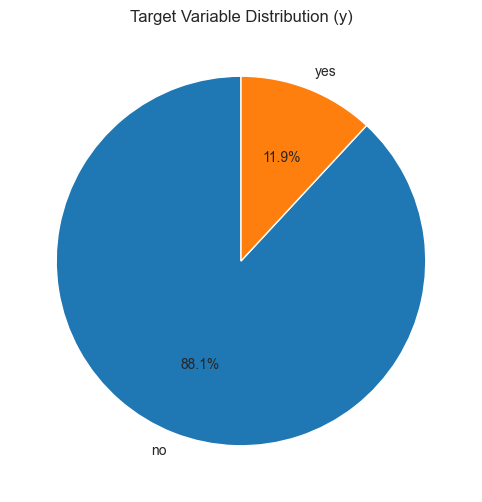

Target variable distribution:
y
no     23124
yes     3122
Name: count, dtype: int64


In [9]:
# Target variable analysis
plt.figure(figsize=(8, 6))
target_counts = train_df['y'].value_counts()
plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Target Variable Distribution (y)')
plt.show()

print("Target variable distribution:")
print(target_counts)

In [10]:
# Encode target variable for correlation analysis
le = LabelEncoder()
train_df['y_encoded'] = le.fit_transform(train_df['y'])

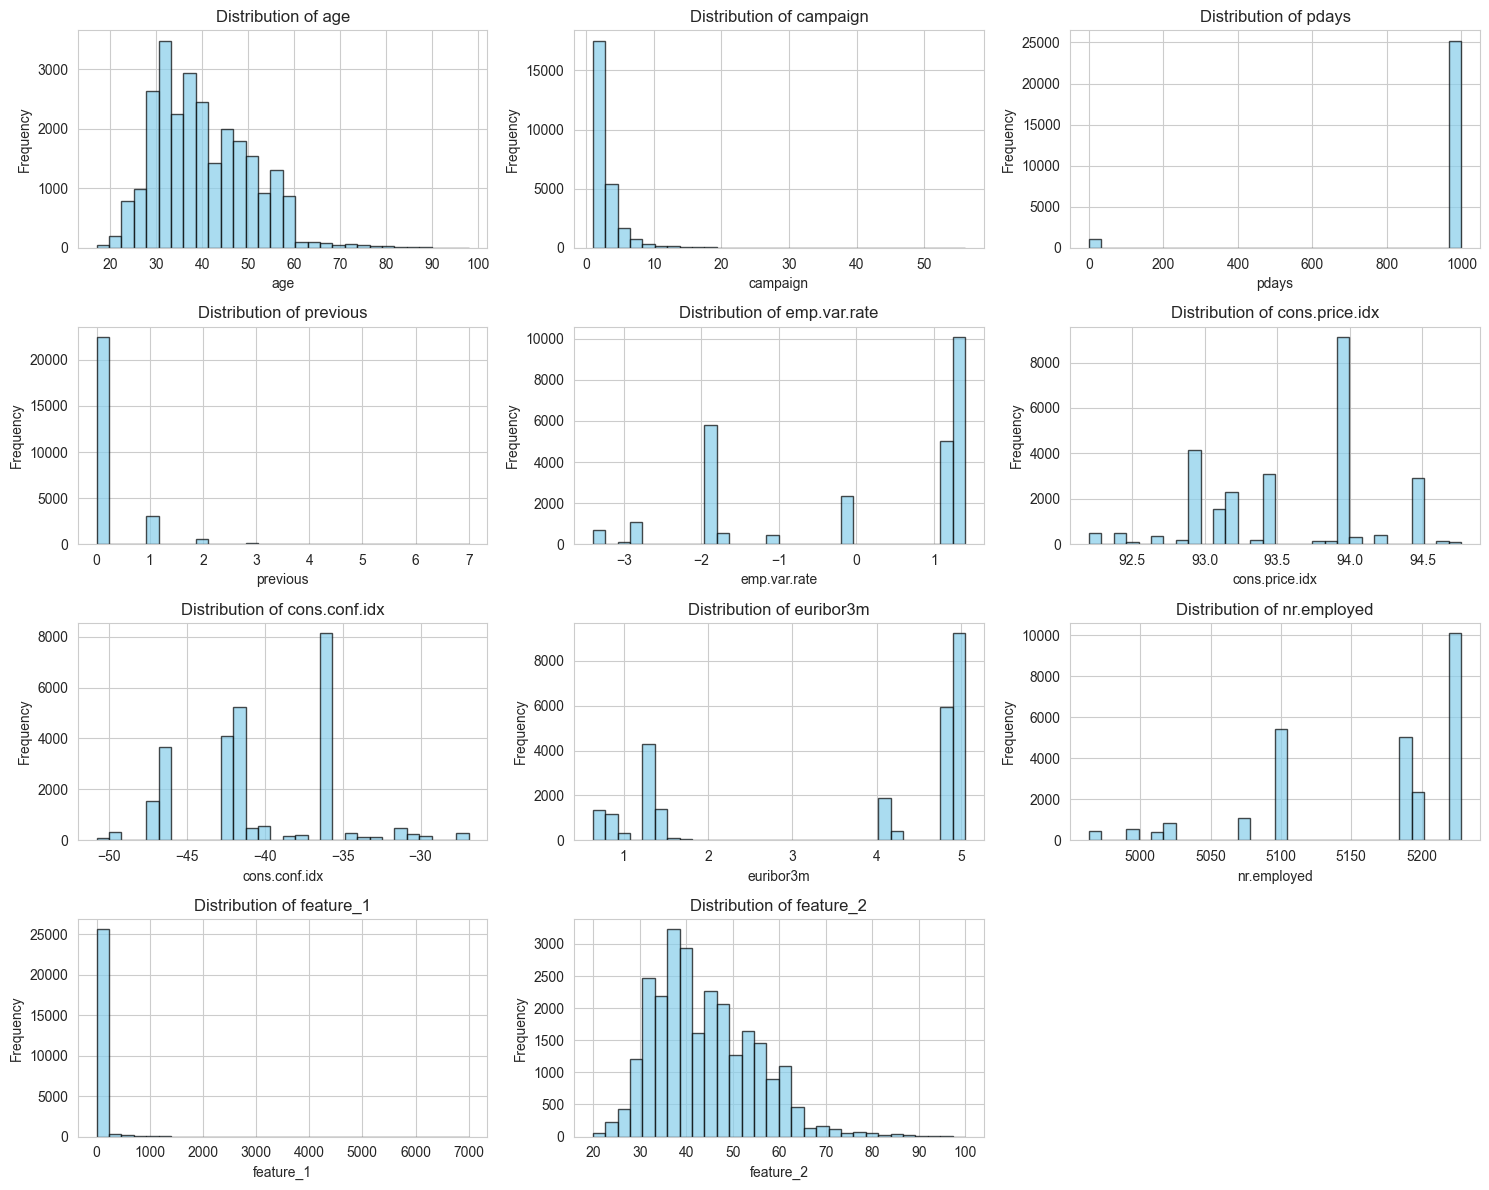

In [11]:
# Numerical features distribution - Fixed version
numerical_features = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
                     'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
                     'feature_1', 'feature_2']

# Plot histograms for numerical features with error handling
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_features):
    # Check for infinite values and replace with NaN
    data = train_df[col].copy()
    if np.any(np.isinf(data)):
        print(f"Warning: Infinite values found in {col}, replacing with NaN")
        data = data.replace([np.inf, -np.inf], np.nan)

    # Remove NaN values for plotting
    plot_data = data.dropna()

    if len(plot_data) > 0:
        axes[i].hist(plot_data, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    else:
        axes[i].text(0.5, 0.5, f'No valid data for {col}',
                    horizontalalignment='center', verticalalignment='center',
                    transform=axes[i].transAxes)
        axes[i].set_title(f'Distribution of {col}')

# Hide empty subplots
for i in range(len(numerical_features), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

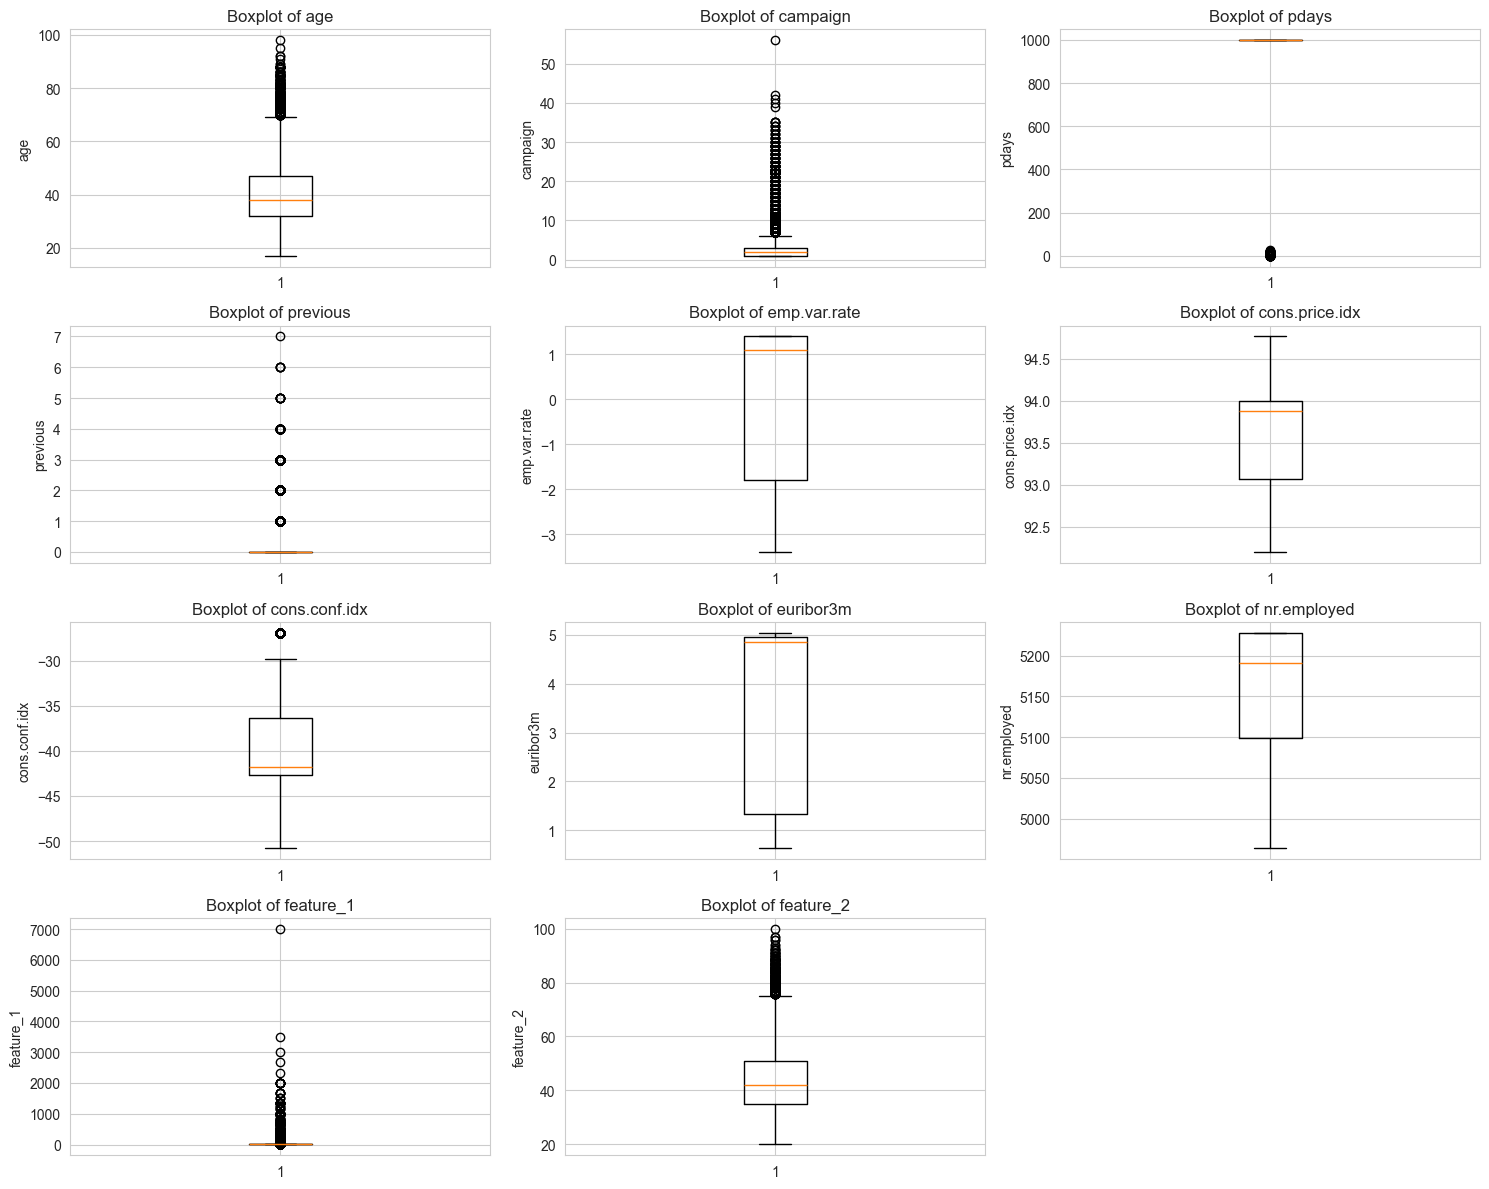

In [12]:
# Boxplots for numerical features to detect outliers - Fixed version
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_features):
    # Check for infinite values and replace with NaN
    data = train_df[col].copy()
    if np.any(np.isinf(data)):
        data = data.replace([np.inf, -np.inf], np.nan)

    # Remove NaN values for plotting
    plot_data = data.dropna()

    if len(plot_data) > 0:
        axes[i].boxplot(plot_data)
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].set_ylabel(col)
    else:
        axes[i].text(0.5, 0.5, f'No valid data for {col}',
                    horizontalalignment='center', verticalalignment='center',
                    transform=axes[i].transAxes)
        axes[i].set_title(f'Boxplot of {col}')

# Hide empty subplots
for i in range(len(numerical_features), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [13]:
# Categorical features analysis
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                       'contact', 'month', 'day_of_week', 'poutcome', 'feature_3',
                       'feature_4', 'feature_5']

print("Unique values in categorical features:")
for col in categorical_features:
    if col in train_df.columns:
        print(f"{col}: {train_df[col].nunique()} unique values")

Unique values in categorical features:
job: 12 unique values
marital: 4 unique values
education: 8 unique values
default: 3 unique values
housing: 3 unique values
loan: 3 unique values
contact: 2 unique values
month: 10 unique values
day_of_week: 5 unique values
poutcome: 3 unique values
feature_3: 20 unique values
feature_4: 104 unique values
feature_5: 90 unique values


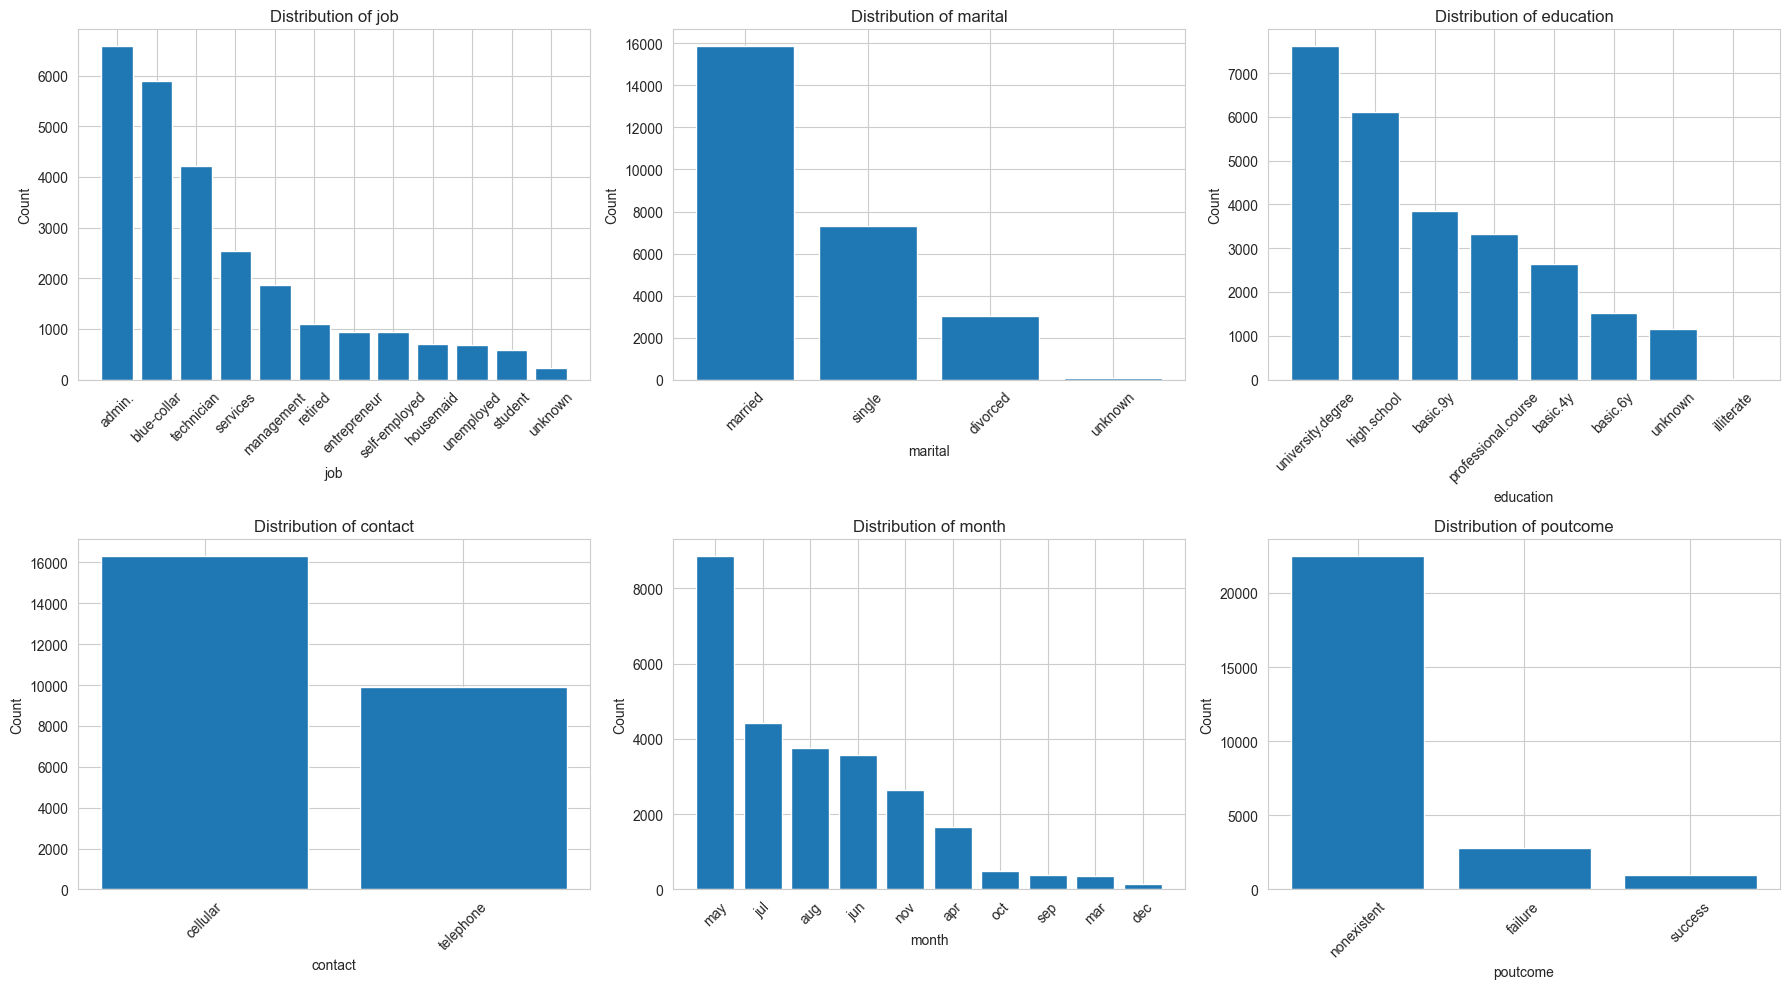

In [14]:
# Plot distribution of main categorical features
main_categorical = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(main_categorical):
    if col in train_df.columns:
        value_counts = train_df[col].value_counts()
        axes[i].bar(range(len(value_counts)), value_counts.values)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].set_xticks(range(len(value_counts)))
        axes[i].set_xticklabels(value_counts.index, rotation=45)

plt.tight_layout()
plt.show()

In [15]:
# Check for 'unknown' values in categorical features
print("'unknown' values in categorical features:")
for col in categorical_features:
    if col in train_df.columns:
        unknown_count = (train_df[col] == 'unknown').sum()
        if unknown_count > 0:
            print(f"{col}: {unknown_count} unknown values ({unknown_count/len(train_df)*100:.2f}%)")

'unknown' values in categorical features:
job: 224 unknown values (0.85%)
marital: 49 unknown values (0.19%)
education: 1154 unknown values (4.40%)
default: 5552 unknown values (21.15%)
housing: 650 unknown values (2.48%)
loan: 650 unknown values (2.48%)


pdays value distribution:
pdays
999    25206
3        310
6        288
4         84
12        41
Name: count, dtype: int64


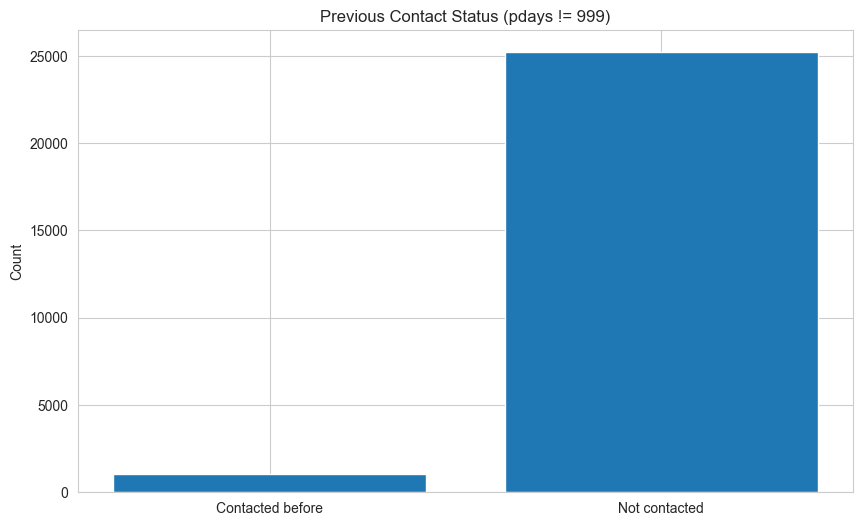

Previously contacted: 1040 (3.96%)
Not contacted before: 25206 (96.04%)


In [16]:
# Analyze pdays feature (999 means not contacted)
print("pdays value distribution:")
pdays_counts = train_df['pdays'].value_counts().head()
print(pdays_counts)

plt.figure(figsize=(10, 6))
contacted = (train_df['pdays'] != 999).sum()
not_contacted = (train_df['pdays'] == 999).sum()

plt.bar(['Contacted before', 'Not contacted'], [contacted, not_contacted])
plt.title('Previous Contact Status (pdays != 999)')
plt.ylabel('Count')
plt.show()

print(f"Previously contacted: {contacted} ({contacted/len(train_df)*100:.2f}%)")
print(f"Not contacted before: {not_contacted} ({not_contacted/len(train_df)*100:.2f}%)")

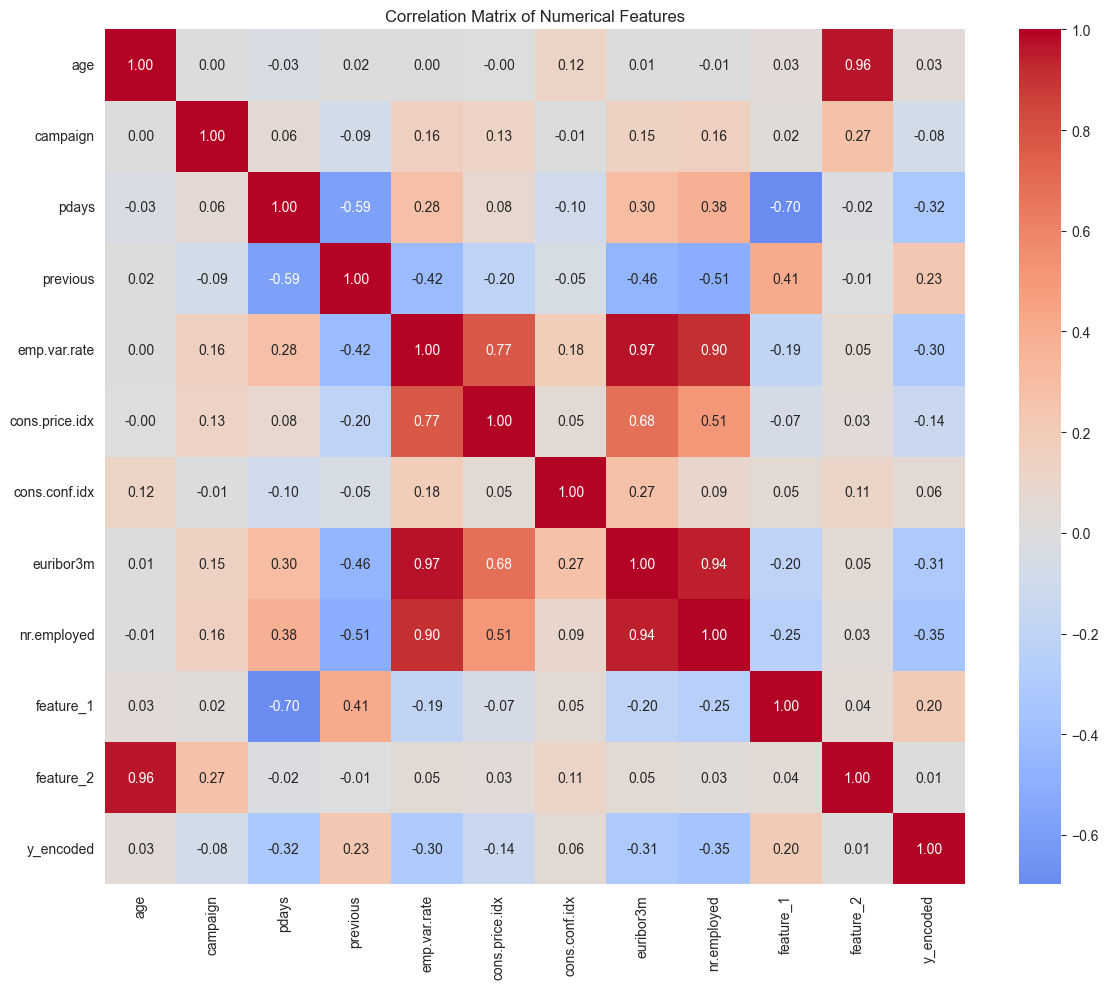

Top correlations with target variable:
nr.employed       0.354162
pdays             0.321800
euribor3m         0.308413
emp.var.rate      0.299736
previous          0.230267
feature_1         0.197704
cons.price.idx    0.138103
campaign          0.076558
cons.conf.idx     0.056809
age               0.032929
Name: y_encoded, dtype: float64


In [17]:
# Correlation analysis for numerical features - Fixed version
# Prepare data for correlation matrix (handle infinite values)
corr_data = train_df[numerical_features + ['y_encoded']].copy()

# Replace infinite values with NaN for correlation calculation
for col in corr_data.columns:
    if np.any(np.isinf(corr_data[col])):
        corr_data[col] = corr_data[col].replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN for correlation calculation
corr_data_clean = corr_data.dropna()

if len(corr_data_clean) > 0:
    correlation_matrix = corr_data_clean.corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Correlation Matrix of Numerical Features')
    plt.tight_layout()
    plt.show()

    # Top correlations with target variable
    target_correlations = correlation_matrix['y_encoded'].abs().sort_values(ascending=False)
    print("Top correlations with target variable:")
    print(target_correlations[1:11])  # Exclude self-correlation
else:
    print("Not enough valid data for correlation analysis")

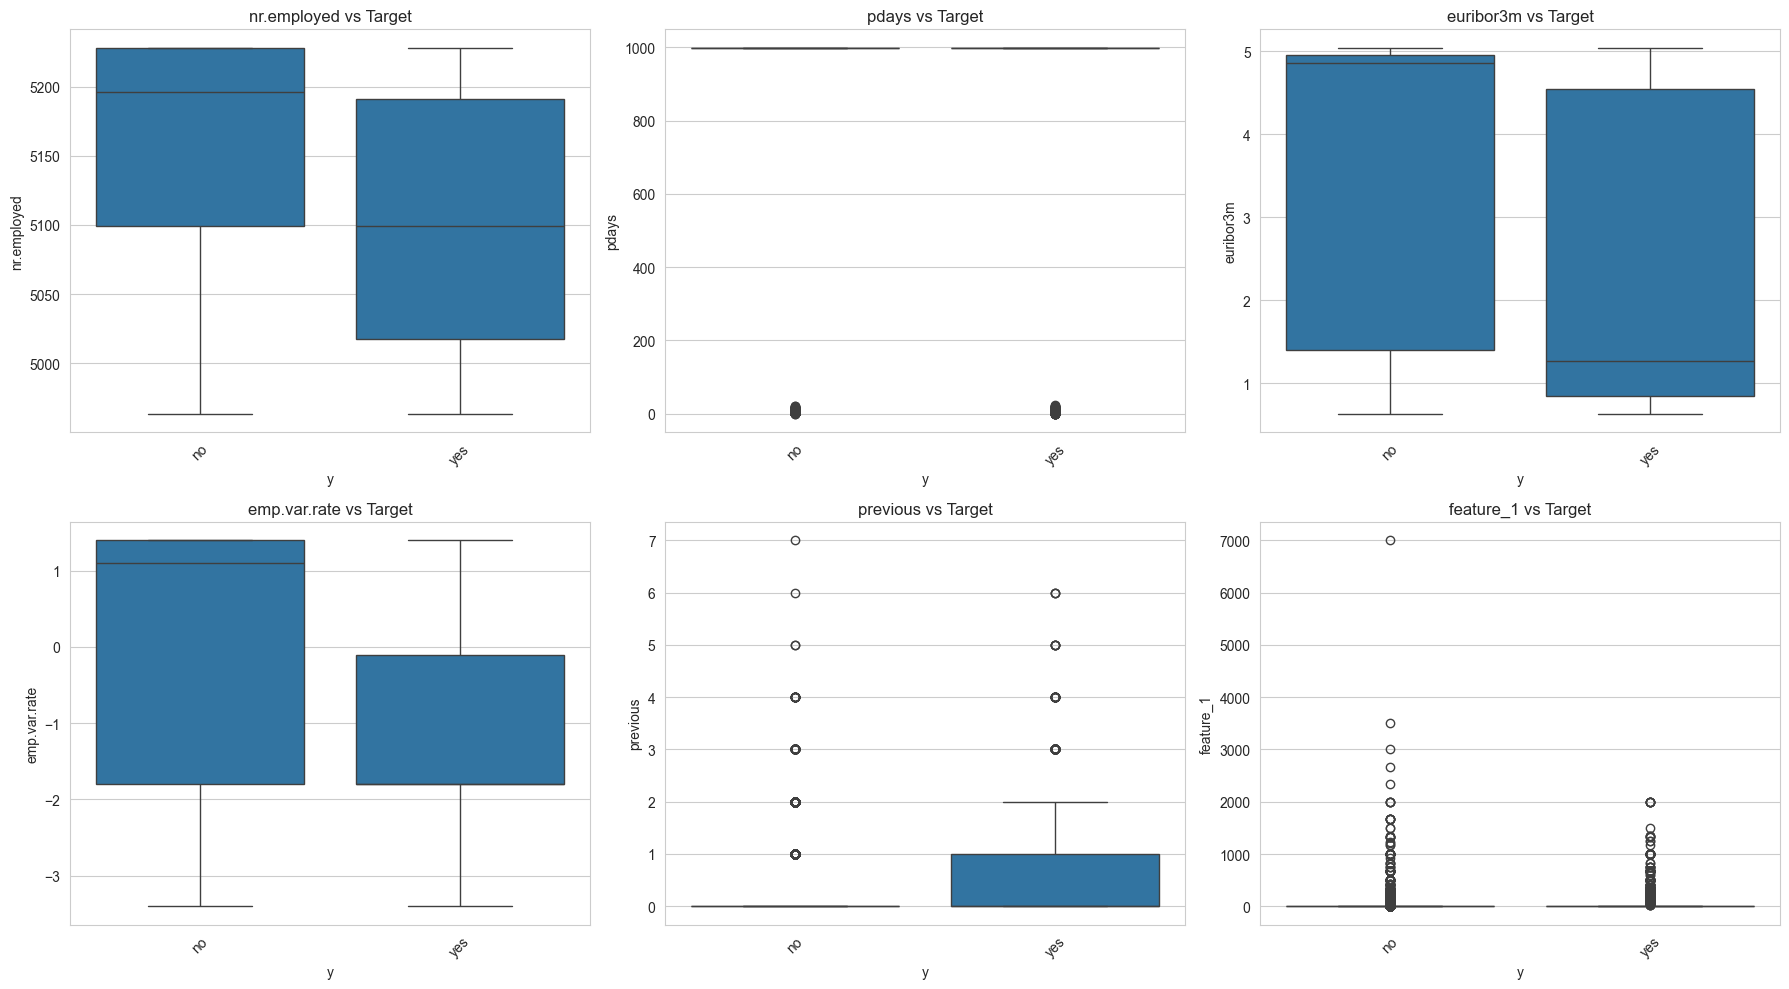

In [18]:
# Analyze relationship between target and key numerical features
if 'target_correlations' in locals():
    key_features = target_correlations.index[1:7]  # Top 6 features excluding target itself

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.ravel()

    for i, feature in enumerate(key_features):
        if feature != 'y_encoded' and feature in train_df.columns:
            # Handle infinite values for plotting
            plot_data = train_df[[feature, 'y']].copy()
            if np.any(np.isinf(plot_data[feature])):
                plot_data[feature] = plot_data[feature].replace([np.inf, -np.inf], np.nan)
            plot_data = plot_data.dropna()

            if len(plot_data) > 0:
                sns.boxplot(data=plot_data, x='y', y=feature, ax=axes[i])
                axes[i].set_title(f'{feature} vs Target')
                axes[i].tick_params(axis='x', rotation=45)
            else:
                axes[i].text(0.5, 0.5, f'No valid data for {feature}',
                            horizontalalignment='center', verticalalignment='center',
                            transform=axes[i].transAxes)
                axes[i].set_title(f'{feature} vs Target')

    plt.tight_layout()
    plt.show()

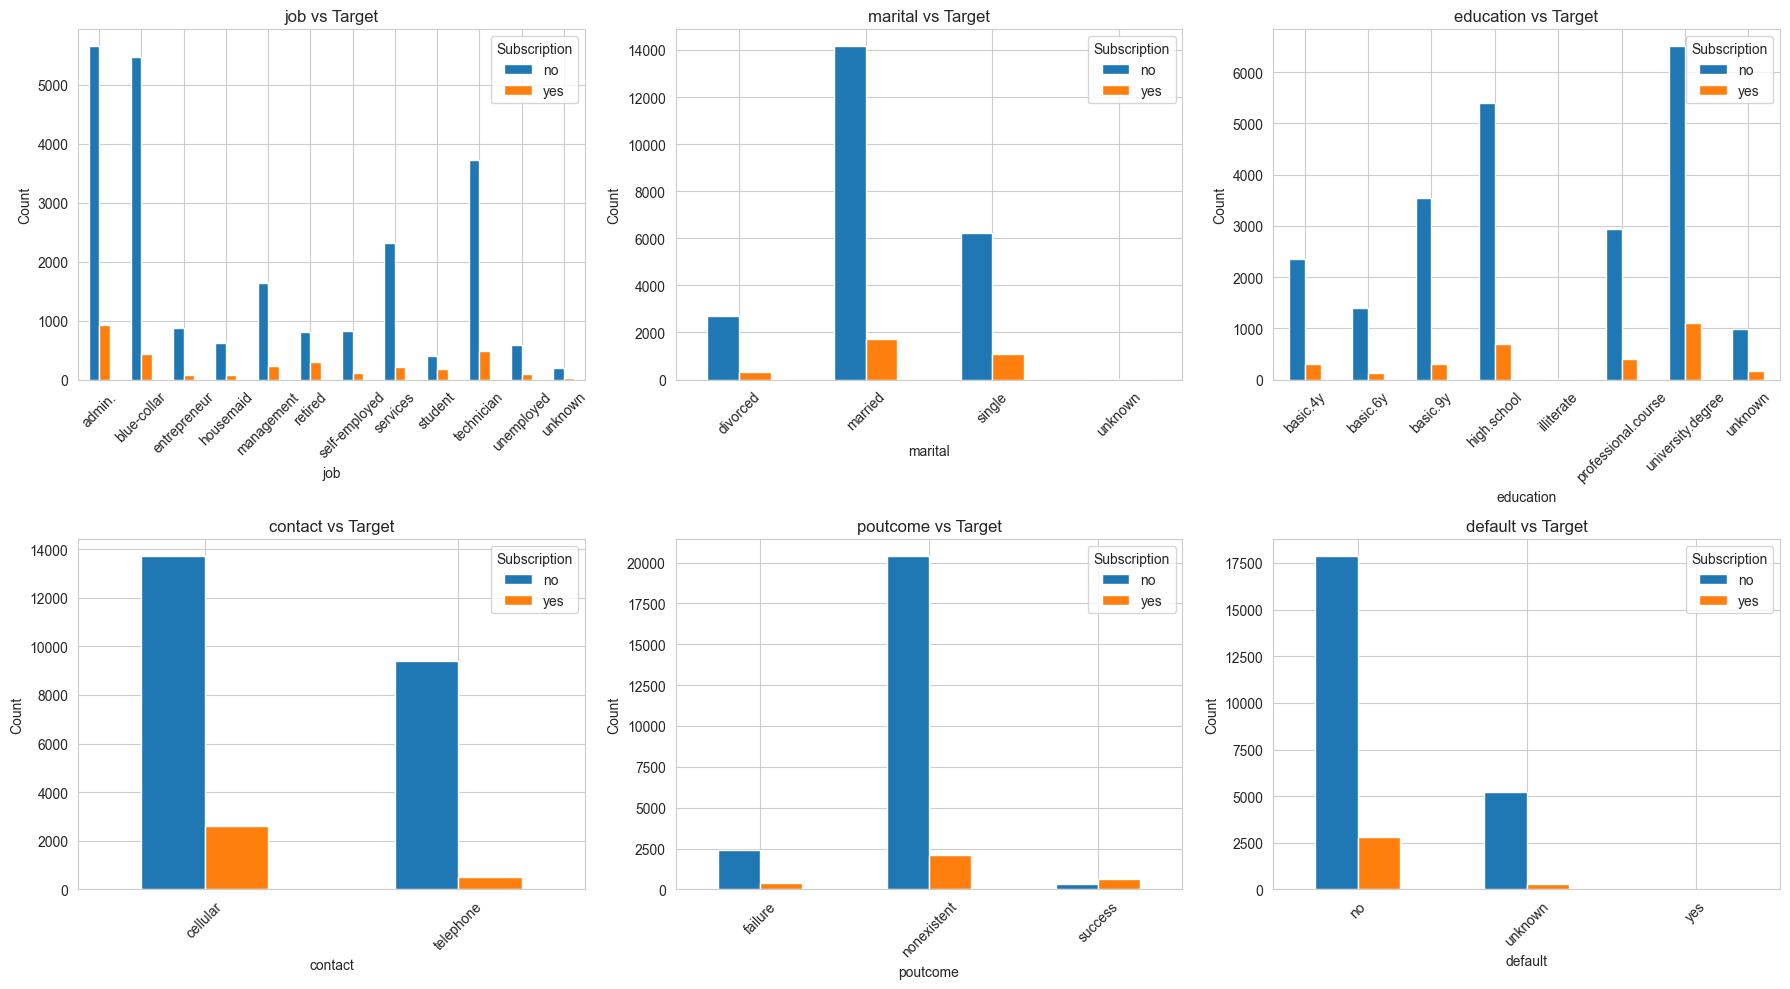

In [19]:
# Analyze relationship between target and categorical features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

categorical_target = ['job', 'marital', 'education', 'contact', 'poutcome', 'default']

for i, col in enumerate(categorical_target):
    if col in train_df.columns:
        cross_tab = pd.crosstab(train_df[col], train_df['y'])
        cross_tab.plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'{col} vs Target')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].legend(title='Subscription')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

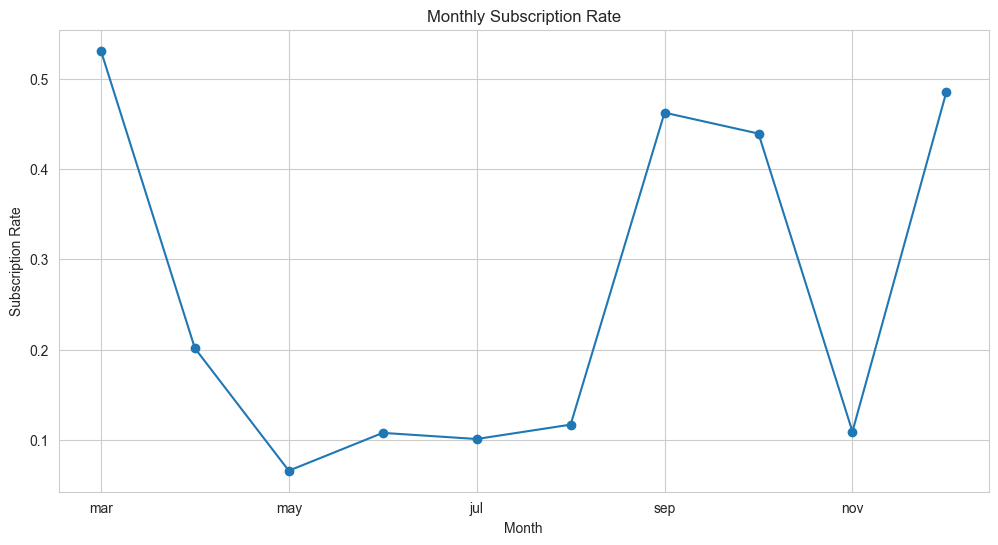

In [20]:
# Monthly trend analysis
if 'month' in train_df.columns:
    month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
    train_df['month'] = pd.Categorical(train_df['month'], categories=month_order, ordered=True)

    monthly_data = train_df.groupby('month')['y_encoded'].mean()

    plt.figure(figsize=(12, 6))
    monthly_data.plot(kind='line', marker='o')
    plt.title('Monthly Subscription Rate')
    plt.xlabel('Month')
    plt.ylabel('Subscription Rate')
    plt.grid(True)
    plt.show()

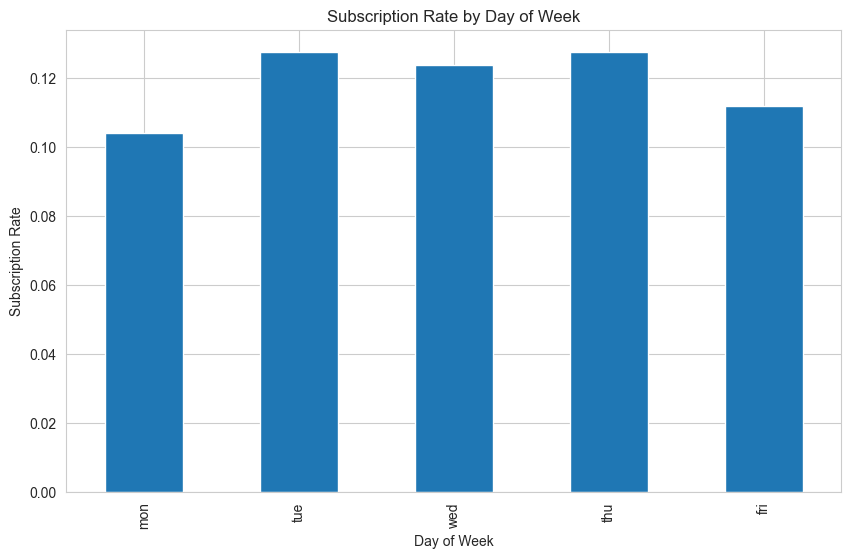

In [21]:
# Day of week analysis
if 'day_of_week' in train_df.columns:
    day_order = ['mon', 'tue', 'wed', 'thu', 'fri']
    train_df['day_of_week'] = pd.Categorical(train_df['day_of_week'], categories=day_order, ordered=True)

    daily_data = train_df.groupby('day_of_week')['y_encoded'].mean()

    plt.figure(figsize=(10, 6))
    daily_data.plot(kind='bar')
    plt.title('Subscription Rate by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Subscription Rate')
    plt.show()

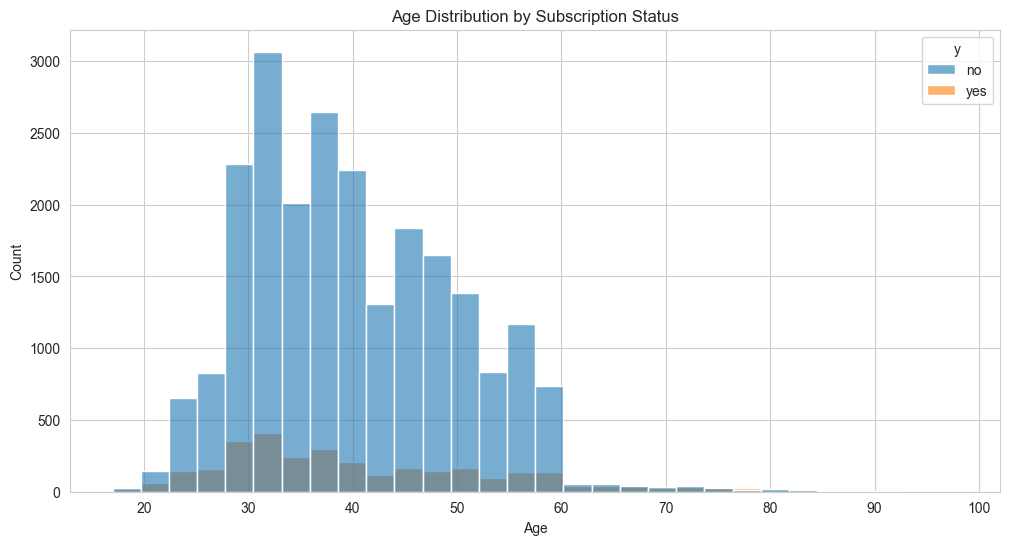

In [22]:
# Age analysis with target
plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x='age', hue='y', bins=30, alpha=0.6)
plt.title('Age Distribution by Subscription Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

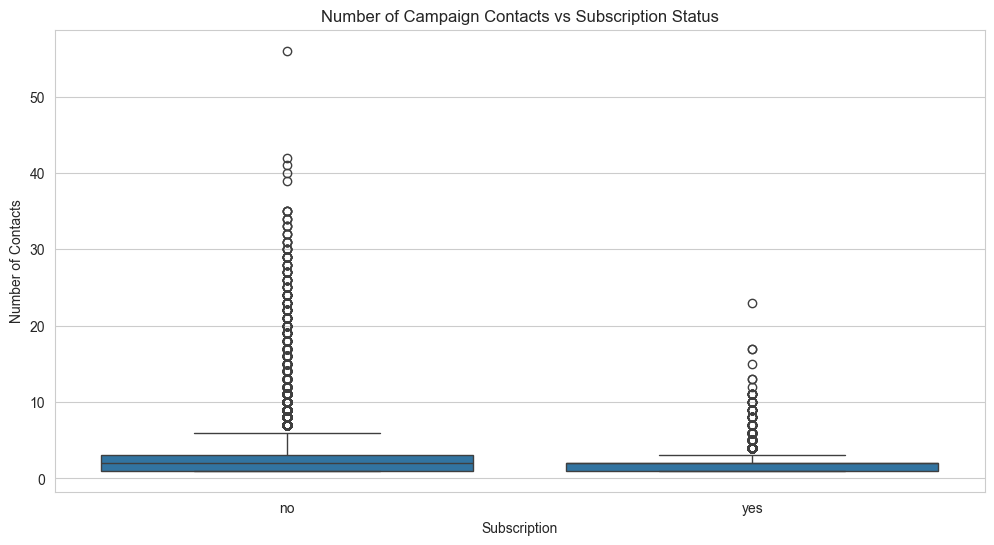

In [23]:
# Campaign contacts analysis
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='y', y='campaign')
plt.title('Number of Campaign Contacts vs Subscription Status')
plt.xlabel('Subscription')
plt.ylabel('Number of Contacts')
plt.show()

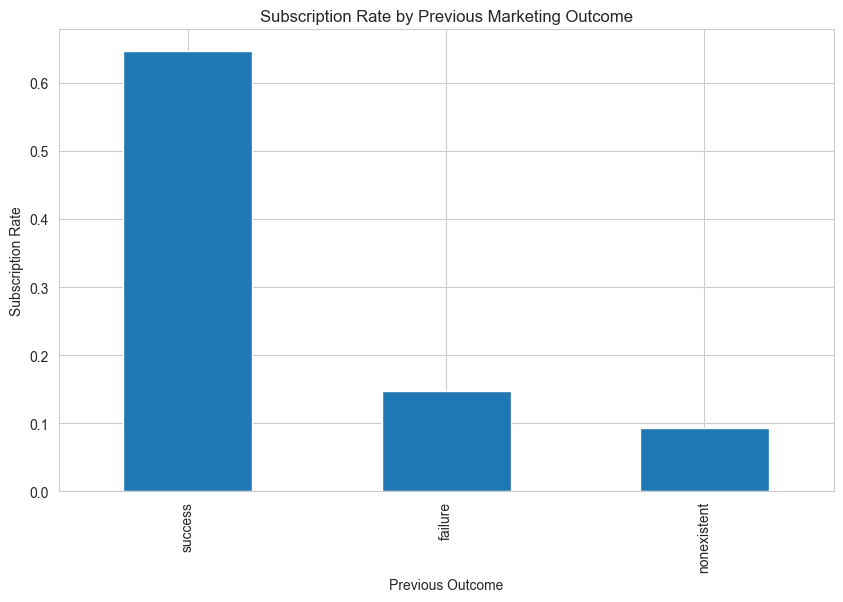

In [24]:
# Previous marketing outcome analysis
if 'poutcome' in train_df.columns:
    poutcome_rates = train_df.groupby('poutcome')['y_encoded'].mean().sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    poutcome_rates.plot(kind='bar')
    plt.title('Subscription Rate by Previous Marketing Outcome')
    plt.xlabel('Previous Outcome')
    plt.ylabel('Subscription Rate')
    plt.show()

In [25]:
# Feature engineering suggestions based on analysis
print("=== FEATURE ENGINEERING SUGGESTIONS ===")
print("1. Handle 'unknown' values in categorical features")
print("2. Create binary feature from pdays: 'previously_contacted'")
print("3. Bin age into categories (young, middle-aged, senior)")
print("4. Transform skewed numerical features (campaign, previous)")
print("5. Create interaction features (job × education, marital × loan)")
print("6. Encode months with seasonal information")
print("7. Handle high cardinality features with target encoding")

=== FEATURE ENGINEERING SUGGESTIONS ===
1. Handle 'unknown' values in categorical features
2. Create binary feature from pdays: 'previously_contacted'
3. Bin age into categories (young, middle-aged, senior)
4. Transform skewed numerical features (campaign, previous)
5. Create interaction features (job × education, marital × loan)
6. Encode months with seasonal information
7. Handle high cardinality features with target encoding


In [26]:
# Data quality summary
print("=== DATA QUALITY SUMMARY ===")
print(f"Training set size: {train_df.shape}")
print(f"Test set size: {test_df.shape}")
print(f"Target distribution: {dict(train_df['y'].value_counts())}")
print(f"Missing values: {train_df.isnull().sum().sum()}")
print(f"Duplicate rows: {train_df.duplicated().sum()}")

=== DATA QUALITY SUMMARY ===
Training set size: (26246, 26)
Test set size: (8000, 24)
Target distribution: {'no': np.int64(23124), 'yes': np.int64(3122)}
Missing values: 0
Duplicate rows: 0


In [27]:
# Save cleaned dataset for modeling
print("Saving processed data...")
train_df_cleaned = train_df.copy()
test_df_cleaned = test_df.copy()

# Basic cleaning: remove duplicates if any
train_df_cleaned = train_df_cleaned.drop_duplicates()
test_df_cleaned = test_df_cleaned.drop_duplicates()

print(f"Cleaned training set: {train_df_cleaned.shape}")
print(f"Cleaned test set: {test_df_cleaned.shape}")

Saving processed data...
Cleaned training set: (26246, 26)
Cleaned test set: (7991, 24)


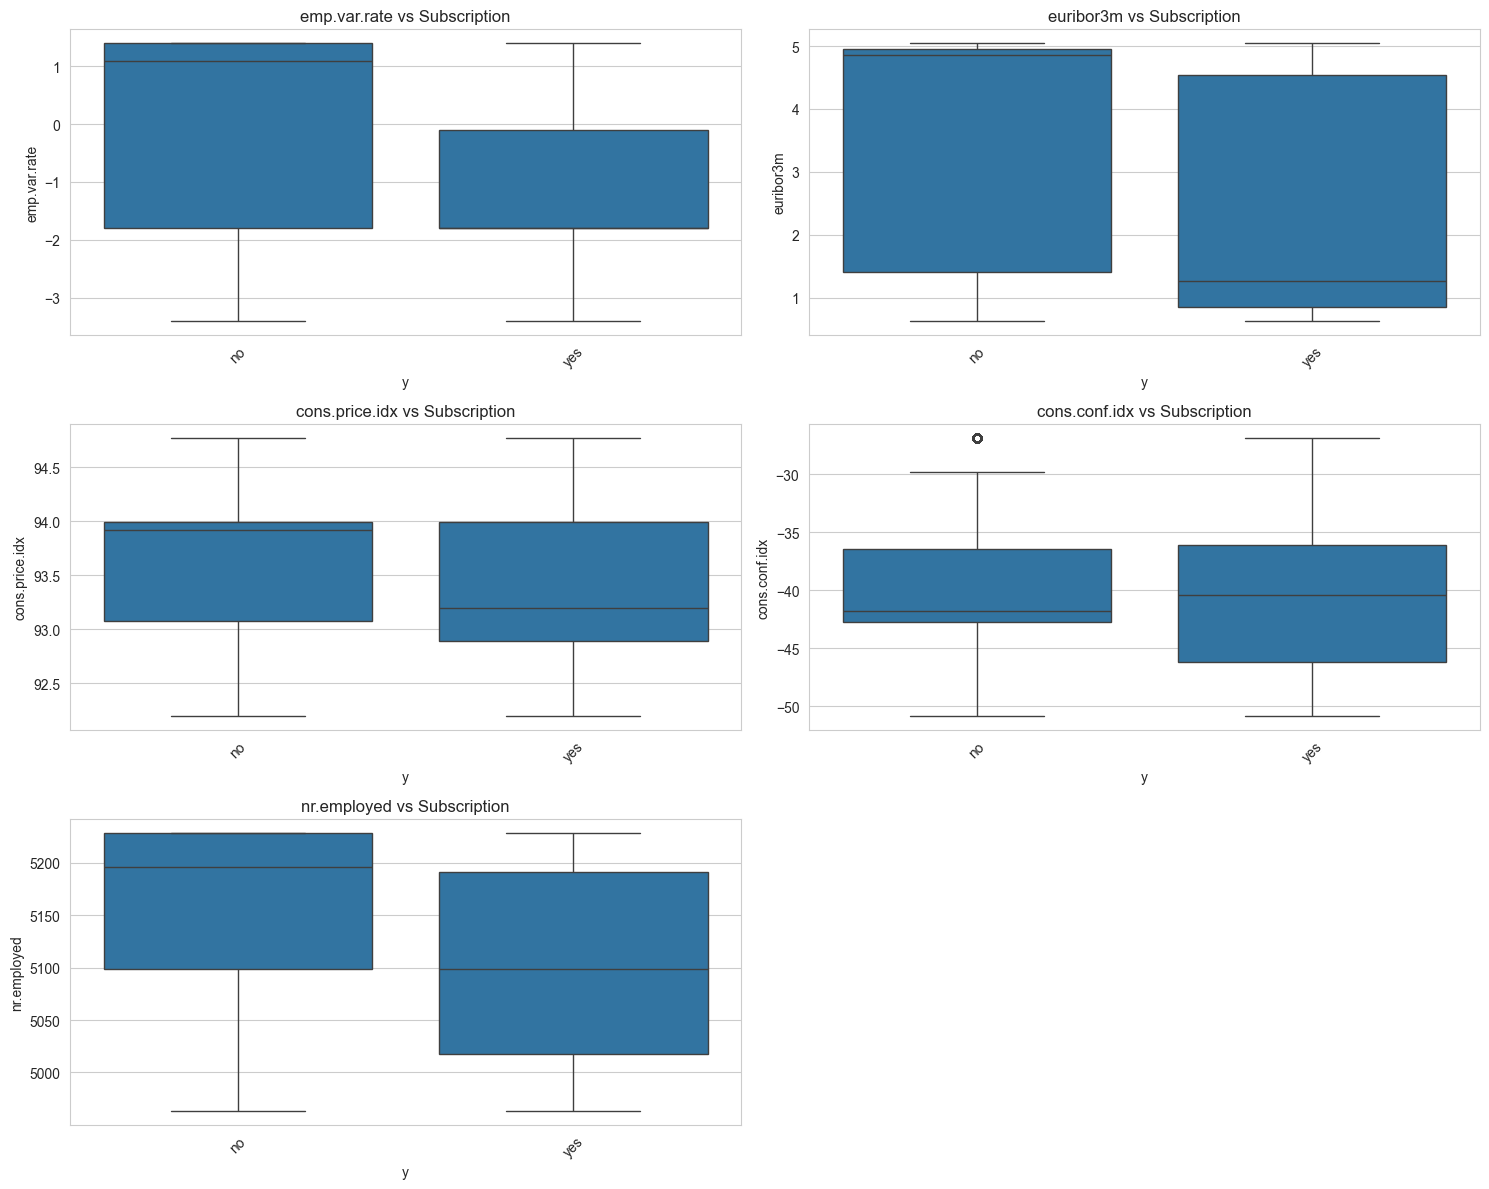

In [28]:
# Additional analysis: Economic indicators over time
economic_features = ['emp.var.rate', 'euribor3m', 'cons.price.idx', 'cons.conf.idx', 'nr.employed']

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(economic_features):
    if i < len(economic_features) and feature in train_df.columns:
        # Handle infinite values
        plot_data = train_df[[feature, 'y']].copy()
        if np.any(np.isinf(plot_data[feature])):
            plot_data[feature] = plot_data[feature].replace([np.inf, -np.inf], np.nan)
        plot_data = plot_data.dropna()

        if len(plot_data) > 0:
            sns.boxplot(data=plot_data, x='y', y=feature, ax=axes[i])
            axes[i].set_title(f'{feature} vs Subscription')
            axes[i].tick_params(axis='x', rotation=45)
        else:
            axes[i].text(0.5, 0.5, f'No valid data for {feature}',
                        horizontalalignment='center', verticalalignment='center',
                        transform=axes[i].transAxes)
            axes[i].set_title(f'{feature} vs Subscription')

# Hide empty subplot
if len(economic_features) < len(axes):
    for i in range(len(economic_features), len(axes)):
        axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [29]:
# %%
# Final insights and recommendations based on actual analysis results
print("=== KEY INSIGHTS AND RECOMMENDATIONS ===")

# 1. Data imbalance analysis
target_ratio = train_df['y'].value_counts(normalize=True)
minority_class_ratio = target_ratio.min()
if minority_class_ratio < 0.3:
    print(f"1. DATA IMBALANCE: Target variable is highly imbalanced (minority class: {minority_class_ratio:.1%})")
else:
    print(f"1. DATA BALANCE: Target variable is reasonably balanced")

# 2. Feature importance based on correlation
if 'target_correlations' in locals():
    top_corr_features = target_correlations.index[1:4]  # Top 3 correlated features
    print(f"2. IMPORTANT FEATURES: {', '.join(top_corr_features)} show highest correlation with target")
else:
    print("2. FEATURE CORRELATION: Check correlation analysis for important features")

# 3. Temporal patterns
if 'monthly_data' in locals() and len(monthly_data) > 0:
    monthly_variation = monthly_data.max() - monthly_data.min()
    if monthly_variation > 0.1:
        print("3. TEMPORAL PATTERNS: Strong monthly patterns in subscription rates")
    else:
        print("3. TEMPORAL PATTERNS: Moderate monthly variation in subscription rates")

# 4. Previous contacts analysis
if 'contacted' in locals() and 'not_contacted' in locals():
    contacted_ratio = contacted / (contacted + not_contacted)
    if contacted_ratio < 0.3:
        print(f"4. PREVIOUS CONTACTS: Most clients ({not_contacted/len(train_df)*100:.1f}%) were not contacted before")
    else:
        print(f"4. PREVIOUS CONTACTS: {contacted_ratio:.1%} of clients were previously contacted")

# 5. Data quality issues
data_quality_issues = []

# Check for missing values
missing_total = train_df.isnull().sum().sum()
if missing_total > 0:
    data_quality_issues.append(f"{missing_total} missing values")

# Check for duplicates
duplicate_count = train_df.duplicated().sum()
if duplicate_count > 0:
    data_quality_issues.append(f"{duplicate_count} duplicate rows")

# Check for infinite values
inf_count = 0
for col in numerical_features:
    if col in train_df.columns:
        inf_count += np.isinf(train_df[col]).sum()
if inf_count > 0:
    data_quality_issues.append(f"{inf_count} infinite values")

# Check for unknown categorical values
unknown_total = 0
for col in categorical_features:
    if col in train_df.columns:
        unknown_total += (train_df[col] == 'unknown').sum()
if unknown_total > 0:
    data_quality_issues.append(f"{unknown_total} 'unknown' categorical values")

if data_quality_issues:
    print(f"5. DATA QUALITY ISSUES: {', '.join(data_quality_issues)}")
else:
    print("5. DATA QUALITY: Good data quality with no major issues")

print("\nRECOMMENDATIONS:")

# Dynamic recommendations based on findings
recommendations = []

if minority_class_ratio < 0.3:
    recommendations.append("- Use appropriate techniques for imbalanced data (SMOTE, class weights)")

if 'target_correlations' in locals() and len(target_correlations) > 1:
    recommendations.append("- Focus on highly correlated features in modeling")

if monthly_variation > 0.05:
    recommendations.append("- Consider seasonal patterns in campaign timing")

if unknown_total > 0:
    recommendations.append("- Handle categorical 'unknown' values appropriately")

if inf_count > 0 or missing_total > 0:
    recommendations.append("- Clean infinite and missing values before modeling")

if duplicate_count > 0:
    recommendations.append("- Remove duplicate rows from dataset")

# Add general recommendations that are always relevant
general_recommendations = [
    "- Perform feature engineering based on domain insights",
    "- Use cross-validation to evaluate model performance",
    "- Consider ensemble methods for better generalization"
]

recommendations.extend(general_recommendations)

# Print all recommendations
for i, rec in enumerate(recommendations, 1):
    print(rec)


=== KEY INSIGHTS AND RECOMMENDATIONS ===
1. DATA IMBALANCE: Target variable is highly imbalanced (minority class: 11.9%)
2. IMPORTANT FEATURES: nr.employed, pdays, euribor3m show highest correlation with target
3. TEMPORAL PATTERNS: Strong monthly patterns in subscription rates
4. PREVIOUS CONTACTS: Most clients (96.0%) were not contacted before
5. DATA QUALITY ISSUES: 11 infinite values, 8279 'unknown' categorical values

RECOMMENDATIONS:
- Use appropriate techniques for imbalanced data (SMOTE, class weights)
- Focus on highly correlated features in modeling
- Consider seasonal patterns in campaign timing
- Handle categorical 'unknown' values appropriately
- Clean infinite and missing values before modeling
- Perform feature engineering based on domain insights
- Use cross-validation to evaluate model performance
- Consider ensemble methods for better generalization
